## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/Anton', force_remount=True)

Mounted at /content/Anton


In [2]:
import os
print(os.getcwd())

/content


In [0]:
import glob
files = glob.glob('/content/Anton/My Drive/Colab Notebooks/CNN/'+ '*.zip')

In [4]:
files

['/content/Anton/My Drive/Colab Notebooks/CNN/sample_submission.csv.zip',
 '/content/Anton/My Drive/Colab Notebooks/CNN/labels.csv.zip',
 '/content/Anton/My Drive/Colab Notebooks/CNN/test.zip',
 '/content/Anton/My Drive/Colab Notebooks/CNN/train.zip']

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [5]:
project_path = "/content/Anton/My Drive/Colab Notebooks/CNN/"
os.chdir(project_path)
print(os.getcwd())

/content/Anton/My Drive/Colab Notebooks/CNN


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

Repeat the same step for test.zip

In [0]:
#extracting test
import zipfile

with zipfile.ZipFile(files[2],"r") as zip_ref:
    zip_ref.extractall(project_path)

Repeat the same step for train.zip

In [0]:
#extracting train

with zipfile.ZipFile(files[3],"r") as zip_ref:
    zip_ref.extractall(project_path)

Repeat the same step for sample_submission.csv.zip

In [0]:
#extracting sample_submission
with zipfile.ZipFile(files[1],"r") as zip_ref:
    zip_ref.extractall(project_path)

Repeat the same step for labels.csv.zip

In [0]:
#Extracting label.csv

with zipfile.ZipFile(files[0],"r") as zip_ref:
    zip_ref.extractall(project_path)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [6]:
import pandas as pd
label = pd.read_csv("labels.csv")
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
label.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [0]:
breedCount = label.groupby(['breed']).count()

In [9]:
breedCount.reset_index(inplace=True)
breedCount.head()

,breed,id
0,affenpinscher,80
1,afghan_hound,116
2,african_hunting_dog,86
3,airedale,107
4,american_staffordshire_terrier,74


In [10]:
breedCount['breed'].nunique()

120

In [11]:
for index, breed in breedCount.iterrows():
  print("Breed Name : {} ---  Count : {}".format(breed['breed'], breed['id']))

Breed Name : affenpinscher ---  Count : 80
Breed Name : afghan_hound ---  Count : 116
Breed Name : african_hunting_dog ---  Count : 86
Breed Name : airedale ---  Count : 107
Breed Name : american_staffordshire_terrier ---  Count : 74
Breed Name : appenzeller ---  Count : 78
Breed Name : australian_terrier ---  Count : 102
Breed Name : basenji ---  Count : 110
Breed Name : basset ---  Count : 82
Breed Name : beagle ---  Count : 105
Breed Name : bedlington_terrier ---  Count : 89
Breed Name : bernese_mountain_dog ---  Count : 114
Breed Name : black-and-tan_coonhound ---  Count : 77
Breed Name : blenheim_spaniel ---  Count : 102
Breed Name : bloodhound ---  Count : 85
Breed Name : bluetick ---  Count : 85
Breed Name : border_collie ---  Count : 72
Breed Name : border_terrier ---  Count : 91
Breed Name : borzoi ---  Count : 75
Breed Name : boston_bull ---  Count : 87
Breed Name : bouvier_des_flandres ---  Count : 86
Breed Name : boxer ---  Count : 75
Breed Name : brabancon_griffon ---  Cou

The names in the label dataframe and the files in the train dataset are in different order, hence they must be mapped to one-to-one basis before futher processing.

In [0]:
projectpath = "/content/Anton/My Drive/Colab Notebooks/CNN/train/"

In [0]:
files = glob.glob(projectpath + '*.*')

In [14]:
j = 1
filecount = len(files)
newlabel = []

for file in files:
  print('\r', str("Label Checked and Assigned : ") + str(j)+"/"+str(filecount), end = '')
  name = file.split('/')[-1]
  name = name.split('.')[0]
  breed = label[label['id'].isin([name])]
  index = label.loc[label['id'].isin([name])].index[0]
  breed = breed['breed'][index]
  newlabel.append(breed)
  j = j + 1

 Label Checked and Assigned : 10222/10222

In [0]:
y_train = dataframe=pd.DataFrame(newlabel, columns=['breed'])

In [16]:
y_train.head()

,breed
0,cocker_spaniel
1,gordon_setter
2,great_pyrenees
3,german_shepherd
4,airedale


### Get one-hot encodings of labels

In [17]:
y_train.values

array([['cocker_spaniel'],
       ['gordon_setter'],
       ['great_pyrenees'],
       ...,
       ['bernese_mountain_dog'],
       ['dandie_dinmont'],
       ['chesapeake_bay_retriever']], dtype=object)

In [0]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(y_train.values)
y_train = ohe.transform(y_train.values)

In [0]:
y_train = y_train.todense()

In [20]:
y_train[0]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [21]:
import cv2

j = 1
scale =  128
train_img = []

for file in files:
  print('\r',"Image Processed : {}/{}".format(j, filecount), end="")
  train_img.append(cv2.resize(cv2.imread(file), (scale, scale)))
  j = j + 1

 Image Processed : 10222/10222

In [0]:
import copy

x_train = copy.deepcopy(train_img)

In [23]:
import numpy as np
np.shape(x_train)

(10222, 128, 128, 3)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#converting to numpy array
x_train = np.asarray(x_train)

In [0]:
#normalizing the image pixel
x_train = x_train/255

In [26]:
np.shape(x_train)

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_Val, y_train, y_Val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
ss = pd.read_csv("sample_submission.csv")

In [0]:
test_img = ss['id'].tolist()

In [30]:
testlen = len(test_img)
print(testlen)

10357


Run the below code to load the test image files in x_test_feature

In [0]:
testpth = "/content/Anton/My Drive/Colab Notebooks/CNN/test/"

In [32]:
scale = 128
x_test_feature = []
i = 1 # initialisation
for f in test_img:
  print('\r',"Image Processed : {}/{}".format(i, testlen),end='')
  img = cv2.imread(testpth + '{}.jpg'.format(f))
  img_resize = cv2.resize(img, (scale, scale)) 
  x_test_feature.append(img_resize)
  i = i + 1

 Image Processed : 10357/10357

Normalize the test data and convert it into 4 dimensions

In [0]:
#converting to numpy array
x_test_feature = np.asarray(x_test_feature)

#normalizing the image pixel
x_test_feature = x_test_feature/255

In [34]:
np.shape(x_test_feature)

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.backend import clear_session
clear_session()

In [0]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(scale, scale, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      18464     
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               121929984 
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 121,984,152
Trainable params: 121,984,152
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_Val, y_Val))

Epoch 1/10
56/56 [==============================] - 7s 129ms/step - loss: 5.5784 - accuracy: 0.0077 - val_loss: 4.7867 - val_accuracy: 0.0098
Epoch 2/10
56/56 [==============================] - 7s 117ms/step - loss: 4.7890 - accuracy: 0.0105 - val_loss: 4.7859 - val_accuracy: 0.0104
Epoch 3/10
56/56 [==============================] - 7s 118ms/step - loss: 4.7769 - accuracy: 0.0157 - val_loss: 4.7728 - val_accuracy: 0.0166
Epoch 4/10
56/56 [==============================] - 7s 118ms/step - loss: 4.3440 - accuracy: 0.1196 - val_loss: 4.8671 - val_accuracy: 0.0205
Epoch 5/10
56/56 [==============================] - 7s 118ms/step - loss: 2.4356 - accuracy: 0.4797 - val_loss: 6.6471 - val_accuracy: 0.0183
Epoch 6/10
56/56 [==============================] - 7s 118ms/step - loss: 0.8174 - accuracy: 0.8309 - val_loss: 9.9190 - val_accuracy: 0.0186
Epoch 7/10
56/56 [==============================] - 6s 116ms/step - loss: 0.2502 - accuracy: 0.9614 - val_loss: 12.3185 - val_accuracy: 0.0218
Epoch

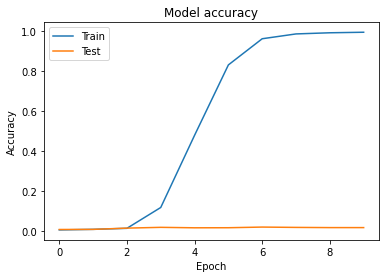

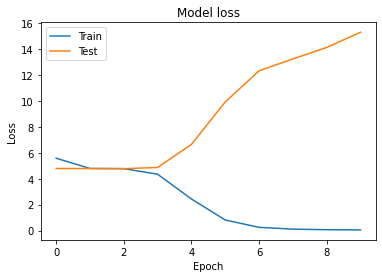

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy =  history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
# implementing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(
        rotation_range = 180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        shear_range = 0.5,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True,
        horizontal_flip=True)

In [0]:
datagen1.fit(X_train)

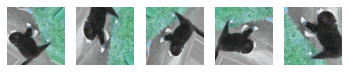

In [0]:
gen = datagen1.flow(X_train[10:11], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
history = model.fit(datagen1.flow(X_train, y_train, batch_size = 128), epochs = 10, 
                              validation_data = (X_Val, y_Val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // 128)

Epoch 1/10
55/55 - 22s - loss: 5.1222 - accuracy: 0.0087 - val_loss: 4.7786 - val_accuracy: 0.0153
Epoch 2/10
55/55 - 22s - loss: 4.7700 - accuracy: 0.0131 - val_loss: 4.7765 - val_accuracy: 0.0091
Epoch 3/10
55/55 - 22s - loss: 4.7634 - accuracy: 0.0141 - val_loss: 4.7667 - val_accuracy: 0.0173
Epoch 4/10
55/55 - 22s - loss: 4.7496 - accuracy: 0.0164 - val_loss: 4.7750 - val_accuracy: 0.0127
Epoch 5/10
55/55 - 22s - loss: 4.7465 - accuracy: 0.0157 - val_loss: 4.7432 - val_accuracy: 0.0183
Epoch 6/10
55/55 - 22s - loss: 4.7226 - accuracy: 0.0179 - val_loss: 4.7261 - val_accuracy: 0.0137
Epoch 7/10
55/55 - 22s - loss: 4.7062 - accuracy: 0.0208 - val_loss: 4.7215 - val_accuracy: 0.0189
Epoch 8/10
55/55 - 22s - loss: 4.7120 - accuracy: 0.0206 - val_loss: 4.7545 - val_accuracy: 0.0143
Epoch 9/10
55/55 - 22s - loss: 4.6859 - accuracy: 0.0204 - val_loss: 4.6721 - val_accuracy: 0.0196
Epoch 10/10
55/55 - 22s - loss: 4.6732 - accuracy: 0.0211 - val_loss: 4.6650 - val_accuracy: 0.0228


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_datagen = ImageDataGenerator(
        rotation_range = 180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        shear_range = 0.5,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(
        rotation_range = 180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        shear_range = 0.5,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True,
        horizontal_flip=True)

In [0]:
train_datagen.fit(X_train)
val_datagen.fit(X_Val)

In [0]:
train_generator = train_datagen.flow(X_train, y_train)
val_generator = train_datagen.flow(X_Val, y_Val)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size = 128), epochs = 10, 
                              validation_data = (X_Val, y_Val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // 128)

Epoch 1/10
55/55 - 22s - loss: 4.6532 - accuracy: 0.0214 - val_loss: 4.6530 - val_accuracy: 0.0186
Epoch 2/10
55/55 - 22s - loss: 4.6628 - accuracy: 0.0211 - val_loss: 4.6571 - val_accuracy: 0.0147
Epoch 3/10
55/55 - 22s - loss: 4.6483 - accuracy: 0.0213 - val_loss: 4.6273 - val_accuracy: 0.0212
Epoch 4/10
55/55 - 22s - loss: 4.6345 - accuracy: 0.0198 - val_loss: 4.6426 - val_accuracy: 0.0202
Epoch 5/10
55/55 - 22s - loss: 4.6278 - accuracy: 0.0226 - val_loss: 4.6368 - val_accuracy: 0.0130
Epoch 6/10
55/55 - 22s - loss: 4.6060 - accuracy: 0.0243 - val_loss: 4.6225 - val_accuracy: 0.0209
Epoch 7/10
55/55 - 22s - loss: 4.6493 - accuracy: 0.0232 - val_loss: 4.6215 - val_accuracy: 0.0176
Epoch 8/10
55/55 - 23s - loss: 4.6026 - accuracy: 0.0226 - val_loss: 4.6142 - val_accuracy: 0.0209
Epoch 9/10
55/55 - 24s - loss: 4.5890 - accuracy: 0.0252 - val_loss: 4.6007 - val_accuracy: 0.0218
Epoch 10/10
55/55 - 23s - loss: 4.5923 - accuracy: 0.0262 - val_loss: 4.6112 - val_accuracy: 0.0173


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [36]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input


base_model= VGG16(weights='imagenet',include_top=False, pooling='avg',input_tensor=Input(shape=(128, 128, 3)))

58892288/58889256 [==============================] - 1s 0us/step


Print the summary of the base_model

In [37]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Make all the layers in the base_model (VGG16) to be non-trainable

In [38]:
for layer in base_model.layers:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4b213646d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad8fea4e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad8fea7f0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ad9018978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad9018b38> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad01f3e48> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ad01fb400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad0206ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad020e4e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ad02153c8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ad0215898> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras import layers, Sequential

In [0]:
new_model = Sequential()
new_model.add(base_model)
new_model.add(layers.Flatten())
new_model.add(layers.Dense(1024, activation='relu'))
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(120, activation='softmax'))

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = new_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_Val, y_Val))

Epoch 1/10
60/60 [==============================] - 10s 168ms/step - loss: 4.7359 - accuracy: 0.0247 - val_loss: 4.6025 - val_accuracy: 0.0348
Epoch 2/10
60/60 [==============================] - 8s 133ms/step - loss: 4.3262 - accuracy: 0.0659 - val_loss: 4.1477 - val_accuracy: 0.0853
Epoch 3/10
60/60 [==============================] - 8s 133ms/step - loss: 3.8353 - accuracy: 0.1254 - val_loss: 3.8514 - val_accuracy: 0.1236
Epoch 4/10
60/60 [==============================] - 8s 133ms/step - loss: 3.4665 - accuracy: 0.1837 - val_loss: 3.5814 - val_accuracy: 0.1553
Epoch 5/10
60/60 [==============================] - 8s 133ms/step - loss: 3.2200 - accuracy: 0.2195 - val_loss: 3.4847 - val_accuracy: 0.1635
Epoch 6/10
60/60 [==============================] - 8s 134ms/step - loss: 3.0522 - accuracy: 0.2525 - val_loss: 3.3750 - val_accuracy: 0.1925
Epoch 7/10
60/60 [==============================] - 8s 134ms/step - loss: 2.9068 - accuracy: 0.2844 - val_loss: 3.3156 - val_accuracy: 0.2019
Epoch

In [0]:
from tensorflow.keras.backend import clear_session
clear_session()

In [43]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Input

Xception_base_model = Xception(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

83689472/83683744 [==============================] - 2s 0us/step


In [0]:
for layer in Xception_base_model.layers:
  layer.trainable = False

In [0]:
from tensorflow.keras import layers, Sequential

InceptionModel = Sequential()
InceptionModel.add(Xception_base_model)
InceptionModel.add(layers.Flatten())
InceptionModel.add(layers.Dense(1024, activation='relu'))
InceptionModel.add(layers.Dense(256, activation='relu'))
InceptionModel.add(layers.Dense(120, activation='softmax'))

In [0]:
from tensorflow.keras.optimizers import SGD, Adagrad, Adamax

sdg = SGD()
adgrad =  Adagrad()
adamax = Adamax()


In [0]:
InceptionModel.compile(optimizer=adgrad,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = InceptionModel.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_Val, y_Val))

Epoch 1/30
60/60 [==============================] - 8s 135ms/step - loss: 1.4064 - accuracy: 0.6898 - val_loss: 2.5701 - val_accuracy: 0.3697
Epoch 2/30
60/60 [==============================] - 8s 135ms/step - loss: 1.3179 - accuracy: 0.7131 - val_loss: 2.5538 - val_accuracy: 0.3846
Epoch 3/30
60/60 [==============================] - 8s 135ms/step - loss: 1.2375 - accuracy: 0.7407 - val_loss: 2.5636 - val_accuracy: 0.3838
Epoch 4/30
60/60 [==============================] - 8s 135ms/step - loss: 1.1634 - accuracy: 0.7679 - val_loss: 2.5533 - val_accuracy: 0.3818
Epoch 5/30
60/60 [==============================] - 8s 135ms/step - loss: 1.0963 - accuracy: 0.7912 - val_loss: 2.5415 - val_accuracy: 0.3873
Epoch 6/30
60/60 [==============================] - 8s 135ms/step - loss: 1.0302 - accuracy: 0.8131 - val_loss: 2.5485 - val_accuracy: 0.3901
Epoch 7/30
60/60 [==============================] - 8s 135ms/step - loss: 0.9731 - accuracy: 0.8309 - val_loss: 2.5403 - val_accuracy: 0.3940
Epoch 

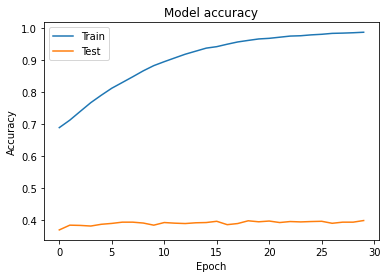

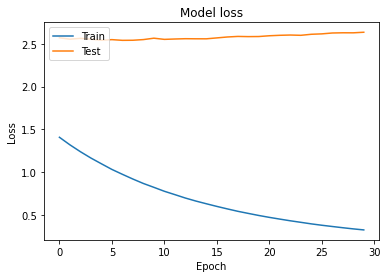

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy =  history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
InceptionModel.predict(x_test_feature)

array([[2.71481235e-06, 5.35646628e-04, 1.49986374e-06, ...,
        4.31645913e-06, 3.45253193e-06, 4.41672964e-05],
       [2.65310821e-03, 1.08172964e-04, 2.34912159e-06, ...,
        2.53573817e-04, 1.13094226e-04, 1.75635665e-04],
       [3.23759275e-04, 4.89250273e-01, 1.12242342e-05, ...,
        3.96140240e-04, 1.22811366e-03, 3.70847760e-03],
       ...,
       [6.95248445e-07, 9.94471920e-05, 2.89783816e-06, ...,
        1.05176288e-04, 7.01534518e-05, 2.09637033e-03],
       [1.08943786e-04, 7.11394299e-04, 4.11109522e-06, ...,
        2.60243483e-04, 2.42649112e-02, 1.45575376e-02],
       [4.60647743e-06, 2.60573938e-06, 3.18194509e-07, ...,
        2.11762427e-03, 3.14694603e-06, 6.69265773e-06]], dtype=float32)

##Summary

1.   VGG16 model is not performing as expected.
2.   Changed over multiple Optimizer and learning rate to fine tune the paramater but nothing possible improve the performance.
3. Was able to get 40% accuracy in InceptionModel with adagrad optimizer.

